<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificaciones

* Architecture
* Input shapes
* Creating custom data
* Steps in modelling
  * Create Model
  * Compile Model
  * Fit Model
  * Improve Model
* Non-linearity
* Evaluation
  * Visualize
  * Training curves
  * Comparing predictions

In [1]:
import tensorflow as tf
import pandas as pd

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [6]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

* Dimensions, Features - X - Independents
* Labels - y - Dependents (what we can to predict=

In [12]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})

In [13]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [16]:
# Check labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

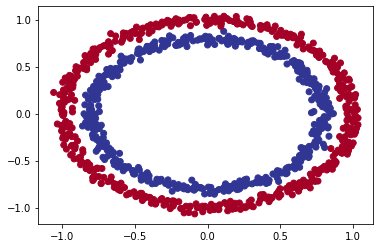

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input & Output shapes 

In [18]:
X.shape, y.shape

((1000, 2), (1000,))

In [19]:
len(X), len(y)

(1000, 1000)

In [20]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Model_0

In [22]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create model
model_0 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit model
model_0.fit(X, y, epochs=200, verbose=0)

In [23]:
model_0.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

## Model_2

In [24]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=100, verbose=0)

In [25]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving model

1. Adding layers
2. Adding number of hidden units
3. Change the activation function
4. Change the optimization function
5. Change the learning rate
6. Fitting more data
7. Fitting for longer

## Model 2

In [26]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [28]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

In [31]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max());

doing multiclass classification...


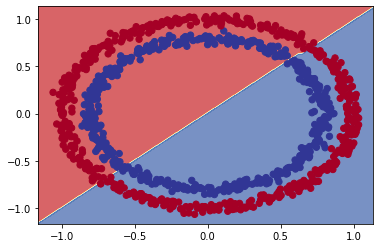

In [32]:
plot_decision_boundary(model_2, X, y)

## Model_3
( Train / Test Split )

In [ ]:
# Set random seed
